In [4]:
from pydantic import BaseModel,Field


class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst.")
    role: str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")
    
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"
    

In [5]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END

import operator
from typing import  Annotated
from langgraph.graph import MessagesState

class InterviewState(MessagesState):
    max_num_turns: int # Number turns of conversation
    context: Annotated[list, operator.add] # Source docs
    analyst: Analyst # Analyst asking questions
    interview: str # Interview transcript
    sections: list # Final key we duplicate in outer state for Send() API

In [6]:
interview_builder = StateGraph(InterviewState)

In [7]:
def ask_question(state:InterviewState):
    """
    ask function
    """
    pass
def search_web(state:InterviewState):
    """
    search_web
    """
    pass
def search_wikipedia(state:InterviewState):
    """
    search_wikipedia
    """
    pass
def generate_answer(state:InterviewState):
    """
    generate_answer
    """
    pass
def save_interview(state:InterviewState):
    """
    save_interview
    """
    pass
def write_section(state:InterviewState):
    """
    write_section
    """
    pass
def route_messages(state:InterviewState):
    """
    route_messages
    """
    pass


In [8]:
interview_builder.add_node("ask_question",ask_question)
interview_builder.add_node("search_web",search_web)
interview_builder.add_node("search_wikipedia",search_wikipedia)
interview_builder.add_node("generate_answer",generate_answer)
interview_builder.add_node("save_interview",save_interview)
interview_builder.add_node("write_section",write_section)




In [9]:
interview_builder.add_edge(START, "ask_question")
interview_builder.add_edge("ask_question","search_web")
interview_builder.add_edge("ask_question","search_wikipedia")
interview_builder.add_edge("search_web","generate_answer")
interview_builder.add_edge("search_wikipedia","generate_answer")
interview_builder.add_conditional_edges("generate_answer",
                           route_messages,
                           ["ask_question",
                            "save_interview"])
interview_builder.add_edge("save_interview","write_section")
interview_builder.add_edge("write_section",END)

In [10]:
graph=interview_builder.compile()

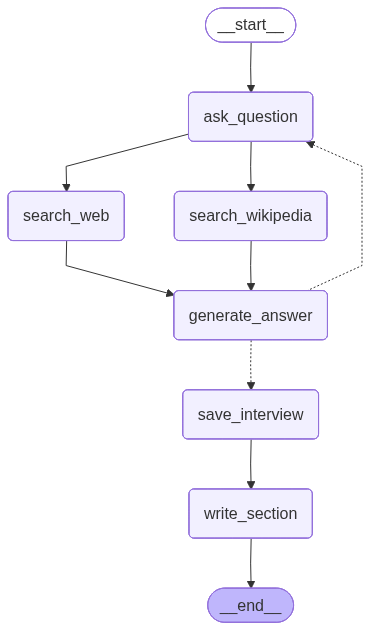

In [11]:
graph